<span>
<b>Author:</b> <a href="http://about.giuliorossetti.net">Giulio Rossetti</a><br/>
<b>Python version:</b>  >=3.6<br/>
<b>Networkx version:</b>  >=2.4<br/>
<b>Last update:</b> 16/02/2021
</span>

<a id='top'></a>
# *Chapter 5: Scale Free*

``Networkx`` is a python library designed to provide support to analysis of complex networks.

In this notebook are introduced some of the main features of the library and an overview of its functionalities.

**Note:** this notebook is purposely not 100% comprehensive, it only discusses the basic things you need to get started. <br/> A complete documentation (and tutorial) is available on the project [website](https://networkx.github.io/documentation/latest/)


In [1]:
import networkx as nx
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import powerlaw
import networkx as nx
import warnings
import scipy.stats as stats
import powerlaw
import math
from collections import defaultdict
warnings.filterwarnings('ignore')

In [2]:
%matplotlib inline 

In [3]:
df2 = pd.read_csv("data_paolo/data_subreddit_cleaned.csv")
df2.head()

,Unnamed: 0,from,to,id,title,score,date,comments,parent
0,0,environment,environment,mx0fiv,"MT Gov. Greg Gianforte Illegally Trapped, Kill...",1656.0,1.619228e+09,90.0,nature
1,1,environment,EcoNewsNetwork,mx6no0,"MT Gov. Greg Gianforte Illegally Trapped, Kill...",8.0,1.619245e+09,0.0,nature
2,2,environment,environment,mwumok,"Tax breaks for fossil fuels 'a disgrace,' Gret...",1216.0,1.619211e+09,33.0,WomenInNews
3,3,environment,TheFightThatMatters,mx3brt,"Tax breaks for fossil fuels 'a disgrace,' Gret...",1.0,1.619236e+09,0.0,WomenInNews
4,4,environment,EcoNewsNetwork,mx34qj,"Tax breaks for fossil fuels 'a disgrace,' Gret...",2.0,1.619235e+09,0.0,WomenInNews


In [4]:
#delete the columns "id"
df=df2.copy()
columns2remove = ['id', 'from','Unnamed: 0']
df.drop(columns2remove, inplace=True, axis=1)
df.head()


,to,title,score,date,comments,parent
0,environment,"MT Gov. Greg Gianforte Illegally Trapped, Kill...",1656.0,1.619228e+09,90.0,nature
1,EcoNewsNetwork,"MT Gov. Greg Gianforte Illegally Trapped, Kill...",8.0,1.619245e+09,0.0,nature
2,environment,"Tax breaks for fossil fuels 'a disgrace,' Gret...",1216.0,1.619211e+09,33.0,WomenInNews
3,TheFightThatMatters,"Tax breaks for fossil fuels 'a disgrace,' Gret...",1.0,1.619236e+09,0.0,WomenInNews
4,EcoNewsNetwork,"Tax breaks for fossil fuels 'a disgrace,' Gret...",2.0,1.619235e+09,0.0,WomenInNews


In [5]:
print('Number of rows =',df.shape[0],', Number of columns =',df.shape[1])
'''"list_indx" is a list of dataframe row indices, which contain the "parent" attribute equal to the "to" attribute -
   The list is sorted in descending order, thus eliminating the rows in descending order.
   In this way, each row of the dataframe retains the original index to be deleted'''

list_indx=sorted(df[df["parent"]== df["to"]].index,reverse=True)

Number of rows = 208841 , Number of columns = 6


In [6]:
list_indx=sorted(df[df["parent"]== df["to"]].index,reverse=True)

df.drop(df.index[list_indx])
print( 'We deleted ',len(list_indx),' Rows from the dataframe df')
g=[]
# Build your graph
g=nx.from_pandas_edgelist(df, 'parent', 'to')

We deleted  9636  Rows from the dataframe df


## Accessing nodes and edges
Given a Graph object is it possible to iterate over its nodes with a simple for loop

In [7]:
for n in g.nodes():
    # do something
    pass

Following a similar rationale is it also possible to loop over the edge set

In [8]:
for e in g.edges():
    # do something
    pass

All graph entities can be used to store additional attributes (weights, labels...). 

For furhter details refer to the [official documentation](https://networkx.github.io/documentation/latest/tutorial.html#adding-attributes-to-graphs-nodes-and-edges)

## Network base statistics 
networkx allows to manipulate nodes as well as edges, count them, and extract relevant global features.

The Network g  has:
 Number of Nodes =  24819 
 Number of Edges =  107065 

Average degree of "Undirected Network" =  8.627664289455659


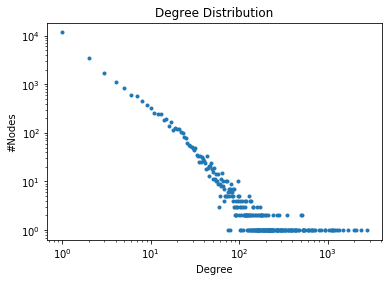

In [9]:
print('The Network g  has:\n Number of Nodes = ',g.number_of_nodes(),'\n Number of Edges = ',g.number_of_edges(),'\n')
print('Average degree of "Undirected Network" = ',sum(dict(g.degree()).values())/float(len(g)))
hist = nx.degree_histogram(g)
    
plt.plot(range(0, len(hist)), hist, ".")
plt.title("Degree Distribution")
plt.xlabel("Degree")
plt.ylabel("#Nodes")
plt.loglog()
plt.show()


In [10]:
def plot_dist(G):
    M = nx.to_scipy_sparse_matrix(G)
    xmin = min([d[1] for d in G.degree()])
    indegrees = M.sum(0).A[0]
    degree = np.bincount(indegrees)
    fit = powerlaw.Fit(np.array(degree)+1, fit_method='KS')#, xmin=xmin, xmax=max(degree)-xmin,discrete=True)
    
    
    fig = plt.figure(figsize=(16, 6)) 
    """ Plot Distribution """
    plt.subplot(1, 3, 1)
    plt.plot(range(len(degree)),degree,'b.')   
    plt.loglog()
    plt.xlim((min(degree), max(degree)))
    plt.xlabel('Degree')
    plt.ylabel('P(k)')


    """ Plot CDF """
    plt.subplot(1, 3, 2)
    fit.plot_cdf()
    plt.xlabel("Degree")
    plt.ylabel('CDF')

    """ Plot CCDF """
    plt.subplot(1, 3, 3)
    fit.power_law.plot_pdf(color='r',linestyle='--',label='fit ccdf')
    fit.plot_ccdf()
    plt.ylabel('CCDF')
    plt.xlabel('Degree')
    plt.tight_layout()
    plt.show()
    print(f'alpha={fit.power_law.alpha+1} sigma={fit.power_law.sigma}')

## Directed Graph

Our Network is direct, so let's analyze the distribution of the degree in and out of the nodes of the Network
DG is our Directed Network

In [11]:
DG=[]
DG = nx.from_pandas_edgelist(df, source='parent', target='to',
                                     edge_attr=['score', 'comments'],
                                     create_using=nx.DiGraph)

In [12]:
'''
#un altro metodo per creare un grafico diretto
DG=[]
DG = nx.DiGraph()

n_row=df.shape[0]

for i in range(1,n_row):
    DG.add_edge(df['parent'].iloc[i],df['to'].iloc[i])
    '''
    

"\n#un altro metodo per creare un grafico diretto\nDG=[]\nDG = nx.DiGraph()\n\nn_row=df.shape[0]\n\nfor i in range(1,n_row):\n    DG.add_edge(df['parent'].iloc[i],df['to'].iloc[i])\n    "

In [13]:
print('The Network DG has:\n Number of Nodes = ',DG.number_of_nodes(),'\n Number of Edges = ',DG.number_of_edges(),'\n')
print('Average degree of "Directed Network" = ',sum(dict(DG.degree()).values())/float(len(DG)))
print('Is a Directed Network ?',DG.is_directed())
nnodes = DG.number_of_nodes()
degrees_in = [d for n, d in DG.in_degree()]
degrees_out = [d for n, d in DG.out_degree()]
avrg_degree_in = sum(degrees_in) / float(nnodes)
avrg_degree_out = sum(degrees_out) / float(nnodes)
print('Average Degree IN = ',avrg_degree_in )
print('Average Degree OUT = ',avrg_degree_out )



The Network DG has:
 Number of Nodes =  24819 
 Number of Edges =  109875 

Average degree of "Directed Network" =  8.854103710866674
Is a Directed Network ? True
Average Degree IN =  4.427051855433337
Average Degree OUT =  4.427051855433337


In [14]:
N, K = DG.order(), DG.size()
avg_deg = float(K) / N
print("Nodes: ", N)
print("Edges: ", K)
print("Average degree: ", avg_deg)
print("SCC: ", nx.number_strongly_connected_components(DG))
print("WCC: ", nx.number_weakly_connected_components(DG))

Nodes:  24819
Edges:  109875
Average degree:  4.427051855433337
SCC:  21343
WCC:  1


We seen the degre in and  out of the nodes

In [15]:
print('IN degree of node "nature"',DG.in_degree('environment'))
print('OUT degree  of node "nature"',DG.out_degree('environment'))

IN degree of node "nature" 132
OUT degree  of node "nature" 218


In [16]:
DG.out_degree()

OutDegreeView({'nature': 17, 'environment': 218, 'EcoNewsNetwork': 55, 'WomenInNews': 15, 'TheFightThatMatters': 0, 'HydroHomies': 47, 'news': 1101, 'environmental_science': 0, 'furry_irl': 27, 'climate': 71, 'uspolitics': 38, 'RuralNewsNetwork': 16, 'anime_titties': 72, 'cleanstreetbets': 3, 'AnythingGoesNews': 31, 'BigTent': 7, 'ClimateDenialism': 0, 'CANNABISfuturus': 40, 'weed': 16, 'Alternative_Energy': 2, 'energy': 125, 'worldnews': 1127, 'Anarchism': 147, 'politics': 1193, 'vegan': 66, 'BigAgro': 2, 'mexico': 14, 'mejico': 0, 'ALLTHEANIMALS': 46, 'Jaguarland': 11, 'UpliftingNews': 223, 'Positive_News': 13, 'ABoringDystopia': 147, 'conservation': 18, 'landconservation': 28, 'water': 15, 'SocialismAndVeganism': 0, 'NatureIsFuckingLit': 926, 'GorillaReddit': 4, 'PublicLands': 7, 'massachusetts': 7, 'BlackLivesMatter': 73, 'AntifascistsofReddit': 36, 'OkBuddyPoliceOfficer': 30, 'Bad_Cop_No_Donut': 237, 'PoliceAccountability1': 0, 'EarningTheHate': 0, 'MAGAs': 57, 'AllCopsAreBad': 4,

In [17]:
DG.in_degree()

InDegreeView({'nature': 13, 'environment': 132, 'EcoNewsNetwork': 133, 'WomenInNews': 3, 'TheFightThatMatters': 123, 'HydroHomies': 128, 'news': 0, 'environmental_science': 16, 'furry_irl': 17, 'climate': 25, 'uspolitics': 64, 'RuralNewsNetwork': 175, 'anime_titties': 47, 'cleanstreetbets': 10, 'AnythingGoesNews': 54, 'BigTent': 67, 'ClimateDenialism': 12, 'CANNABISfuturus': 5, 'weed': 55, 'Alternative_Energy': 0, 'energy': 58, 'worldnews': 48, 'Anarchism': 159, 'politics': 46, 'vegan': 127, 'BigAgro': 10, 'mexico': 36, 'mejico': 14, 'ALLTHEANIMALS': 5, 'Jaguarland': 7, 'UpliftingNews': 53, 'Positive_News': 54, 'ABoringDystopia': 182, 'conservation': 2, 'landconservation': 3, 'water': 14, 'SocialismAndVeganism': 21, 'NatureIsFuckingLit': 0, 'GorillaReddit': 11, 'PublicLands': 5, 'massachusetts': 22, 'BlackLivesMatter': 54, 'AntifascistsofReddit': 121, 'OkBuddyPoliceOfficer': 25, 'Bad_Cop_No_Donut': 119, 'PoliceAccountability1': 20, 'EarningTheHate': 28, 'MAGAs': 41, 'AllCopsAreBad': 22

## Synthetic Networks 
``networkx`` allows to generate synthetic network datasets. 

## 1.Barabasi-Albert (scale-free) graphs

**Growth:** 
While the random network model assumes that the number of nodes is fixed (time invariant), real networks are the result of a growth process that continuously increases.


**Preferential Attachment:**
While nodes in random networks randomly choose their interaction partner, in real networks new nodes prefer to link to the more connected nodes.


In [18]:
number_nodes=g.number_of_nodes()
m = 8  # number of links each node establishes once joining the network
ba = nx.barabasi_albert_graph(number_nodes, m)
#nx.draw(ba)

### Degree distribution with powerlaw fit

Calculating best minimal value for power law fit


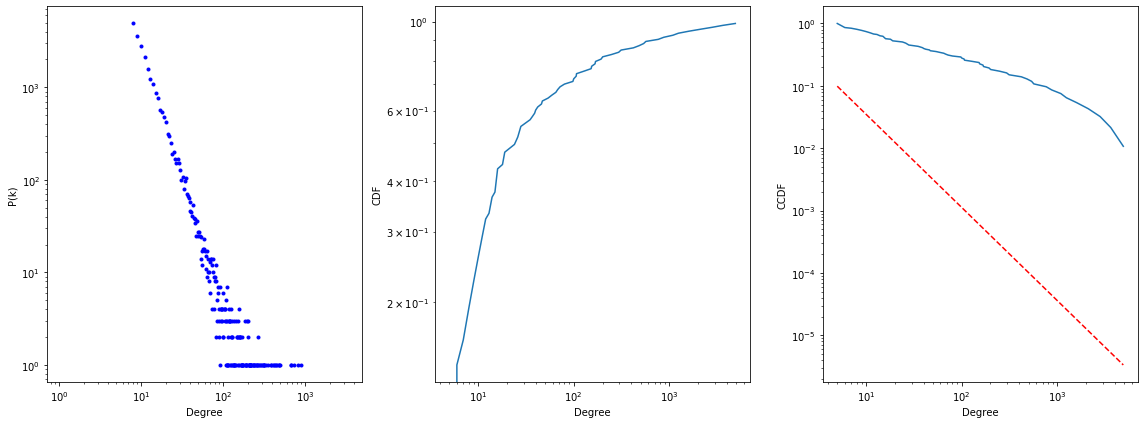

alpha=2.493597506361832 sigma=0.051183677073661345

 Degree distribution with powerlaw fit of Synthetic Networks,Barabasi-Albert (scale-free) graphs, with m=8


In [19]:
plot_dist(ba)
print('\n Degree distribution with powerlaw fit of Synthetic Networks,Barabasi-Albert (scale-free) graphs, with m=8')

Calculating best minimal value for power law fit


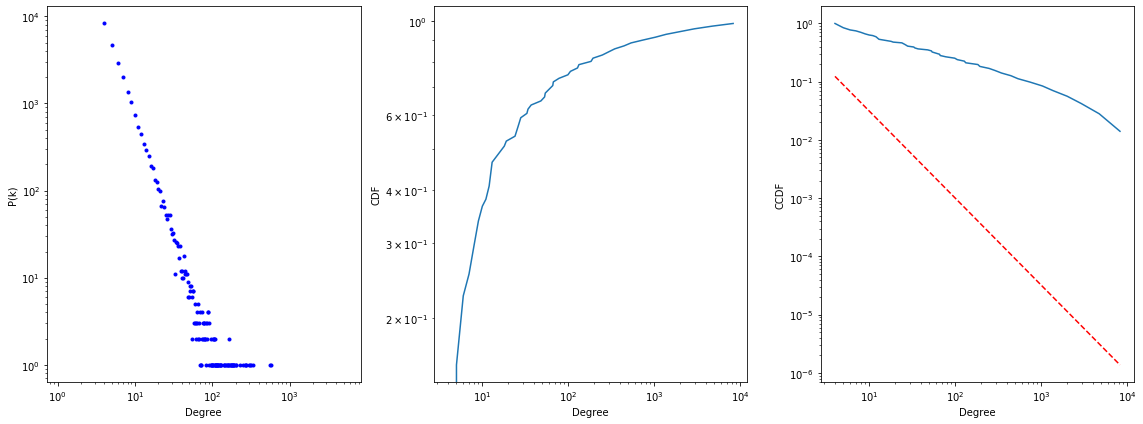

alpha=2.494023059534115 sigma=0.058629750577989775

 Degree distribution with powerlaw fit of Synthetic Networks,Barabasi-Albert (scale-free) graphs, with m = 4


In [20]:
m = 4  # number of links each node establishes once joining the network
ba = nx.barabasi_albert_graph(number_nodes, m)
plot_dist(ba)
print('\n Degree distribution with powerlaw fit of Synthetic Networks,Barabasi-Albert (scale-free) graphs, with m = 4')

## Degree distribution with powerlaw fit of our Undirected Network g

Calculating best minimal value for power law fit


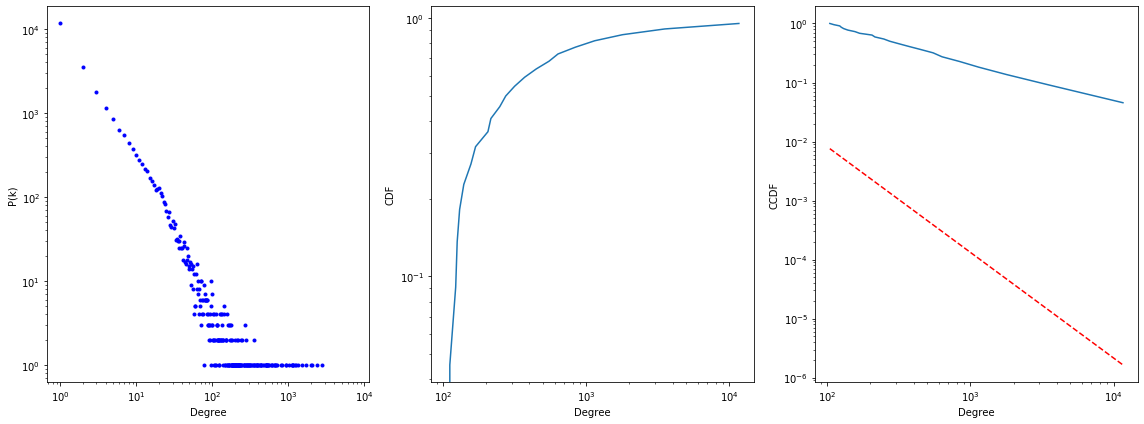

alpha=2.7880183452853604 sigma=0.1680060757162016

 Degree distribution with powerlaw fit of our Undirected Network g


In [21]:

plot_dist(g)
print('\n Degree distribution with powerlaw fit of our Undirected Network g')

## Degree distribution with powerlaw fit of  Directed Network DG

Calculating best minimal value for power law fit


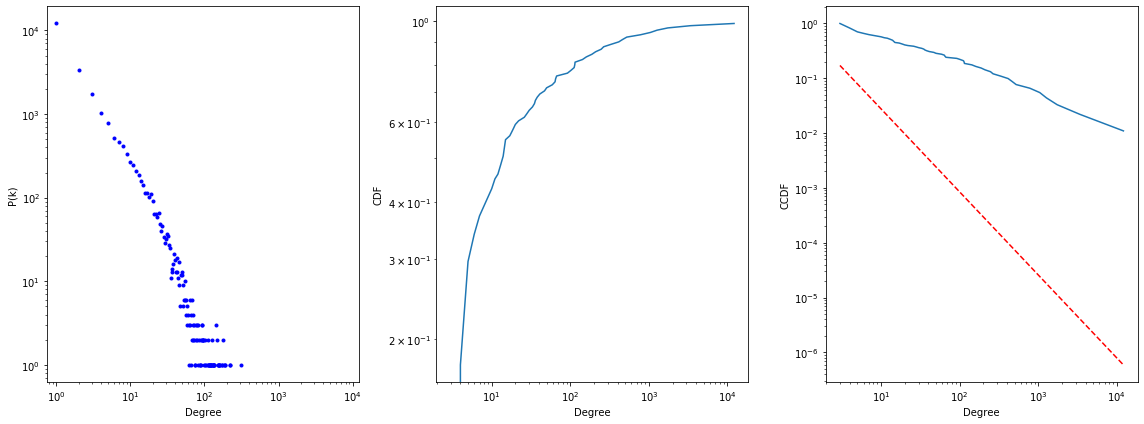

alpha=2.514367468720558 sigma=0.05392036179627965
Degree distribution with powerlaw fit of Directed Network DG


In [22]:
# displaying the title

plot_dist(DG)
print("Degree distribution with powerlaw fit of Directed Network DG")

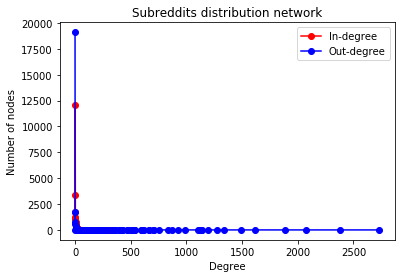

In [23]:
nnodes = DG.number_of_nodes()
degrees_in = [d for n, d in DG.in_degree()]
degrees_out = [d for n, d in DG.out_degree()]
avrg_degree_in = sum(degrees_in) / float(nnodes)
avrg_degree_out = sum(degrees_out) / float(nnodes)
 
in_values = sorted(set(degrees_in))
in_hist = [degrees_in.count(x) for x in in_values]
out_values = sorted(set(degrees_out))
out_hist = [degrees_out.count(x) for x in out_values]
 
plt.figure()
plt.plot(in_values,in_hist,'ro-') # in-degree
plt.plot(out_values,out_hist,'bo-') # out-degree
plt.legend(['In-degree','Out-degree'])
plt.xlabel('Degree')
plt.ylabel('Number of nodes')
plt.title('Subreddits distribution network')
plt.show()
